cvb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

learninig_rate  = should be < 0.1
max_depth = 2-8 ( not seen much benefits in deeper trees )

subsample = 30-80% and compared to a value of 100% for no sampling ( trainig_data )

n_estimators = 100-1000 then tune the learning_rate accordingly

If the system is overlearning, decrease the learning rate and/or increase the number of trees.

If the system is underlearning, speed the learning up to be more aggressive by increasing the learning rate and/or decreasing the number of trees.

##### The parameters to consider tunning are :
The number and size of trees (n_estimators and max_depth).

The learning rate and number of trees (learning_rate and n_estimators).

The row and column subsampling rates (subsample, colsample_bytree and colsample_bylevel).

##### Imbalanced classification
For an imbalanced binary classification dataset, the negative class refers to the majority class (class 0) and the positive class refers to the minority class (class 1).

" scale_pose_weight " parameter is used for imbalanced classes ,  For example, for a dataset with a 1 to 100 ratio for examples in the minority to majority classes, the scale_pos_weight can be set to 100 or Scale_pose_weight for imb_classes = no.of majory class / no.of minority class

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
df = pd.read_excel(r'C:/BEPEC Python Material/Machine Learning/Logistic Regression/credit_card.xlsx', engine='openpyxl')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
column_names = df.loc[0,:]
column_names = column_names.to_list()
l1 = df.columns
l1 = l1.to_list()
df.columns = column_names
df.rename(columns= {'PAY_0':'PAY_1'}, inplace=True)
df.drop([0], inplace=True)
column_names = df.columns
for column in column_names:
    df[column] = pd.to_numeric(df[column]) 
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.drop(columns={'ID'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_1                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
print(sss.get_n_splits(X, y))
print(sss)

train_idx = 0
test_idx = 0
for train_idx , test_idx in sss.split(X,y):
    X_train  , X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train  , y_test = y.iloc[train_idx], y.iloc[test_idx]

1
StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.1,
            train_size=None)


In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

(27000, 23)
(3000, 23)
(27000,)
(3000,)
0    23364
1     6636
Name: default payment next month, dtype: int64
0    21028
1     5972
Name: default payment next month, dtype: int64
0    2336
1     664
Name: default payment next month, dtype: int64


In [10]:
# error
from numpy import loadtxt
data = loadtxt('C:/BEPEC Python Material/Machine Learning/Logistic Regression/credit_card.xlsx', delimiter=",")
data

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 22: character maps to <undefined>

In [9]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)

C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:12:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.80%


In [12]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred),"\n------------------")


[[2193  143]
 [ 403  261]] 
------------------


In [13]:
print(metrics.classification_report(y_test, y_pred  ))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2336
           1       0.65      0.39      0.49       664

    accuracy                           0.82      3000
   macro avg       0.75      0.67      0.69      3000
weighted avg       0.80      0.82      0.80      3000



# Monitor Performance and Early Stopping

In [42]:
eval_set = [(X_test, y_test)]
clf.fit(X_train, y_train, eval_metric="error", early_stopping_rounds = 5, eval_set=eval_set, verbose=True)
# eval_metric = ['loss' , 'logloss']
# early_stoping_rounds can be used to stop trsainig when no improvemens have been seen on validation set/data.

[0]	validation_0-error:0.17933
[1]	validation_0-error:0.18033
[2]	validation_0-error:0.18200
[3]	validation_0-error:0.17900
[4]	validation_0-error:0.17900
[5]	validation_0-error:0.17967
[6]	validation_0-error:0.17767
[7]	validation_0-error:0.17867
[8]	validation_0-error:0.18000
[9]	validation_0-error:0.17833
[10]	validation_0-error:0.17900


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

In [44]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.23%


In [45]:
print(metrics.classification_report(y_test, y_pred  ))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2336
           1       0.67      0.38      0.49       664

    accuracy                           0.82      3000
   macro avg       0.76      0.66      0.69      3000
weighted avg       0.81      0.82      0.80      3000



In [47]:
print(clf.best_score, clf.best_iteration , clf.best_ntree_limit)
# only avaible if early stoping is used
# it is best_score , best_iterations of our model ans best No.of tree limits 

0.177667 6 7


# Feature Importance with XGBoost

In [65]:
l1 = X_train.columns
l2 = clf.feature_importances_
for i in range(len(clf.feature_importances_)):
    print(l1[i] , ":" , l2[i])


LIMIT_BAL : 0.014850998
SEX : 0.012223338
EDUCATION : 0.0114940815
MARRIAGE : 0.0073538865
AGE : 0.008610836
PAY_1 : 0.57442766
PAY_2 : 0.1139623
PAY_3 : 0.027472321
PAY_4 : 0.036314767
PAY_5 : 0.032684304
PAY_6 : 0.022224722
BILL_AMT1 : 0.015081432
BILL_AMT2 : 0.010669304
BILL_AMT3 : 0.009478167
BILL_AMT4 : 0.009961251
BILL_AMT5 : 0.009016116
BILL_AMT6 : 0.008481382
PAY_AMT1 : 0.01238911
PAY_AMT2 : 0.017443884
PAY_AMT3 : 0.01834563
PAY_AMT4 : 0.010271644
PAY_AMT5 : 0.0084678205
PAY_AMT6 : 0.008775044


<Figure size 720x360 with 0 Axes>

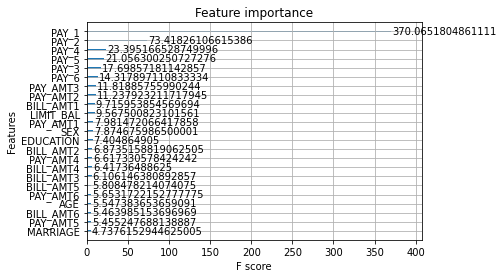

In [73]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
plt.figure(figsize = (10,5))
plot_importance(clf ,     height=0.2 , importance_type = "gain")
plt.show()

# How to configure Gradient Boosting

cvb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

learninig_rate  = should be < 0.1
max_depth = 2-8 ( not seen much benefits in deeper trees )

subsample = 30-80% and compared to a value of 100% for no sampling ( trainig_data )

n_estimators = 100-1000 then tune the learning_rate accordingly

If the system is overlearning, decrease the learning rate and/or increase the number of trees.

If the system is underlearning, speed the learning up to be more aggressive by increasing the learning rate and/or decreasing the number of trees.

# XGBoost Hyperparameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
# do not execute the cell below this cell !!!!!!!!!!!  

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
n_estimators = [10 , 15 , 20 , 25 , 22 , 8 , 30 , 100]
colsample_bylevel = [1 , 0.5 , 0.8 , 0.9 , 0.75 , 0.6]
colsample_bytree = [1 , 0.5 , 0.8 , 0.9 , 0.75 , 0.6]
param_grid = dict(learning_rate=learning_rate ,n_estimators = n_estimators , colsample_bytree = colsample_bytree , 
                 colsample_bylevel = colsample_bylevel)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(clf, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best score : %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

    # Below pic you can see documentation for colsample , colsample_bytree/level etc

![](Xgboost.png)
